## 빈도수에 의한 자연어 처리

### 데이터 전처리

In [110]:
it_sentences = [
    "인공지능 기술이 사회의 다양한 분야에 점점 더 널리 적용되고 있다.",
    "클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으로 만들어 주며, 기업의 IT 인프라를 혁신하고 있다.",
    "머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링에 혁명을 일으키고 있다.",
    "블록체인 기술은 금융 거래의 투명성과 보안성을 향상시키는데 기여하고 있다.",
    "사이버 보안은 디지털 시대의 중요한 이슈로 부상하고 있으며, 지속적인 관심과 개선이 요구된다.",
    "소프트웨어 개발에서의 애자일 방법론은 빠른 시장 변화에 효과적으로 대응할 수 있게 해준다.",
    "데이터 과학과 분석은 비즈니스 의사 결정 과정에서 중요한 역할을 하며, 기업의 경쟁력을 강화시킨다.",
    "사물인터넷(IoT) 기술은 일상 생활을 더욱 편리하고 연결된 공간으로 변화시키고 있다.",
    "가상현실(VR)과 증강현실(AR) 기술은 엔터테인먼트, 교육, 의료 등 다양한 분야에서 새로운 경험을 제공한다.",
    "파이썬은 데이터 과학, 웹 개발, 자동화 스크립트 작성 등 다양한 프로그래밍 작업에 널리 사용되는 언어이다."
]

In [111]:

# 하나의 묶음 문장 작성

text = ''.join(it_sentences)
type(text), len(text)

(str, 508)

### 불용어 처리(stop words)

In [112]:
import re
replace_word = ''
pattern = r'(다양한|로|에|의)' # 대상을 조사
text_regex = re.sub(pattern=pattern, repl=replace_word, string=text)
text_regex


'인공지능 기술이 사회  분야 점점 더 널리 적용되고 있다.클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으 만들어 주며, 기업 IT 인프라를 혁신하고 있다.머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링 혁명을 일으키고 있다.블록체인 기술은 금융 거래 투명성과 보안성을 향상시키는데 기여하고 있다.사이버 보안은 디지털 시대 중요한 이슈 부상하고 있으며, 지속적인 관심과 개선이 요구된다.소프트웨어 개발서 애자일 방법론은 빠른 시장 변화 효과적으 대응할 수 있게 해준다.데이터 과학과 분석은 비즈니스 사 결정 과정서 중요한 역할을 하며, 기업 경쟁력을 강화시킨다.사물인터넷(IoT) 기술은 일상 생활을 더욱 편리하고 연결된 공간으 변화시키고 있다.가상현실(VR)과 증강현실(AR) 기술은 엔터테인먼트, 교육, 료 등  분야서 새운 경험을 제공한다.파이썬은 데이터 과학, 웹 개발, 자동화 스크립트 작성 등  프그래밍 작업 널리 사용되는 언어이다.'

In [113]:
text_split = text_regex.split(sep=' ')
type(text_split), len(text_split), text_split[:4]

(list, 108, ['인공지능', '기술이', '사회', ''])

### 단어(명사, 품사, 대명사 등등) 사전


In [114]:
# 단어마다 빈도수

from collections import Counter
counter_text_split = Counter(text_split)
type(counter_text_split), counter_text_split.most_common()[:10] # get list

# 불용어 처리(word cloud에서 불용어 처리 필요, and is of the)

(collections.Counter,
 [('', 3),
  ('데이터', 3),
  ('기술은', 3),
  ('널리', 2),
  ('더욱', 2),
  ('기업', 2),
  ('중요한', 2),
  ('등', 2),
  ('인공지능', 1),
  ('기술이', 1)])

### Word Cloud

In [115]:
# 한글 처리

# !apt-get -y install fonts-nanum

# !ls /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf

In [116]:
from wordcloud import WordCloud

In [117]:
wordCloud = WordCloud(background_color='grey', font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf')


In [118]:
# wordCloud.generate_from_text(text_regex)

# wordCloud.generate_from_frequencies(counter_text_split) # 내가 원하는 단어들을 넣기 위한 발판

tops_counter_dict = dict(counter_text_split.most_common()[:10]) # get list
# tops_counter_dict
wordCloud.generate_from_frequencies(tops_counter_dict)


In [119]:
wordCloud.words_

{'': 1.0,
 '데이터': 1.0,
 '기술은': 1.0,
 '널리': 0.6666666666666666,
 '더욱': 0.6666666666666666,
 '기업': 0.6666666666666666,
 '중요한': 0.6666666666666666,
 '등': 0.6666666666666666,
 '인공지능': 0.3333333333333333,
 '기술이': 0.3333333333333333}

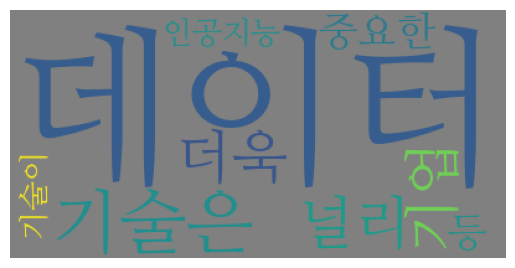

In [120]:
import matplotlib.pyplot as plt

plt.imshow(wordCloud)
plt.axis('off')

plt.show()